In [134]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
st.title('Hackuta 2023')

In [135]:
! git clone https://github.com/HackUTA-23/utd-grades

Cloning into 'utd-grades'...


remote: Enumerating objects: 2834, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 2834 (delta 26), reused 32 (delta 19), pack-reused 2706
Receiving objects: 100% (2834/2834), 7.55 MiB | 5.58 MiB/s, done.
Resolving deltas: 100% (1496/1496), done.


In [136]:
cd utd-grades

/Users/amitkulkarni/Downloads/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data/utd-grades


In [137]:
cd raw_data/

/Users/amitkulkarni/Downloads/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data/utd-grades/raw_data


In [138]:
ls

Fall 2017.csv    Fall 2022.csv    Spring 2022.csv  Summer 2021.csv
Fall 2018.csv    Spring 2018.csv  Spring 2023.csv  Summer 2022.csv
Fall 2019.csv    Spring 2019.csv  Summer 2018.csv
Fall 2020.csv    Spring 2020.csv  Summer 2019.csv
Fall 2021.csv    Spring 2021.csv  Summer 2020.csv


In [139]:
df = pd.read_csv('Fall 2022.csv')
print(df)

     Subject Catalog Nbr Section    A+     A   A-    B+     B   B-   C+  ...  \
0       ACCT        2301     001  17.0   7.0  3.0  14.0   7.0  3.0  2.0  ...   
1       ACCT        2301     002  10.0   7.0  5.0   6.0   4.0  4.0  4.0  ...   
2       ACCT        2301     003   8.0  11.0  8.0   4.0  11.0  5.0  4.0  ...   
3       ACCT        2301     004   4.0  10.0  7.0  17.0   5.0  3.0  6.0  ...   
4       ACCT        2301     005  21.0  11.0  4.0  13.0   3.0  3.0  2.0  ...   
...      ...         ...     ...   ...   ...  ...   ...   ...  ...  ...  ...   
2937    VPAS        6336     501   NaN   6.0  1.0   NaN   1.0  NaN  1.0  ...   
2938    VPAS        6339     501   NaN  16.0  1.0   NaN   NaN  NaN  NaN  ...   
2939    VPAS        6391     001   NaN   9.0  1.0   NaN   NaN  NaN  NaN  ...   
2940    VPAS        6394     001   NaN  11.0  NaN   NaN   NaN  NaN  NaN  ...   
2941    VPAS        7360     001   NaN   9.0  4.0   NaN   NaN  NaN  NaN  ...   

      CR  NC   I  W         Instructor 

In [142]:
# combine subject, catalog, and section columns into one column
df['course'] = df['Subject'] + ' ' + df['Catalog Nbr'] + ' ' + df['Section']
# remove the subject, catalog, and section columns, since they are not needed anymore
df = df.drop(columns=['Subject', 'Catalog Nbr', 'Section'])
df = df.drop(columns=['P', 'CR', 'NC', 'I', 'W', 'Instructor 1', 'Instructor 2', 'Instructor 3', 'Instructor 4', 'Instructor 5', 'Instructor 6'])
# drop columns that are NaN
# df = df.dropna(axis=1, how='all')
# set the course column as the index
df = df.set_index('course')
df

,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F
course,,,,,,,,,,,,,
ACCT 2301 001,17.0,7.0,3.0,14.0,7.0,3.0,2.0,4.0,1.0,1.0,NaN,NaN,1.0
ACCT 2301 002,10.0,7.0,5.0,6.0,4.0,4.0,4.0,1.0,7.0,3.0,NaN,NaN,5.0
ACCT 2301 003,8.0,11.0,8.0,4.0,11.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,3.0
ACCT 2301 004,4.0,10.0,7.0,17.0,5.0,3.0,6.0,4.0,1.0,NaN,NaN,1.0,1.0
ACCT 2301 005,21.0,11.0,4.0,13.0,3.0,3.0,2.0,3.0,1.0,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPAS 6336 501,NaN,6.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
VPAS 6339 501,NaN,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VPAS 6391 001,NaN,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


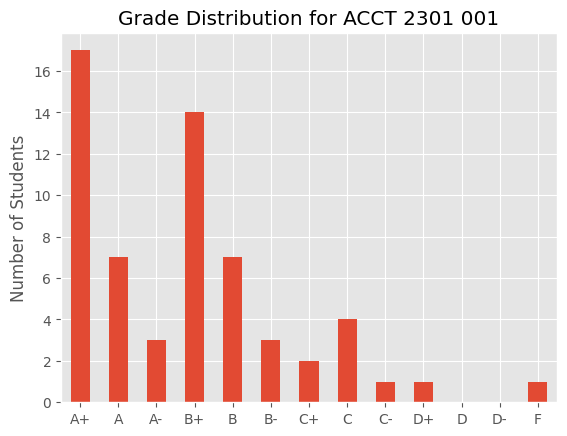

In [153]:
# plot the first course and its grade distribution
df.iloc[0].plot.bar()
# rotate to be more readable
plt.xticks(rotation=0)
plt.ylabel('Number of Students')
plt.title('Grade Distribution for ' + df.index[0])
plt.show()

# New Section

# New Section